# 1. Lecture overview

We discuss several key quantities we frequently use to describe a stock's performance (usually in a past period):

- Holding period return
- Total return (compounding)
- Geometric average of returns
- Real returns (adjusting for inflation)

We then work through a real world application where we use the above quantities to describe the performance of Tesla (TSLA) over the past 5 years.

# 2. Holding period return (HPR)

We use this when we want to calculate the total (net) return of a stock over a give period of time (the "holding period") and we know the value of the stock at the start and the end of that period. 

Generally speaking, to calculate the HPR of any financial asset, we must:
1. Calculate the value at the end of the holding period of all the cash flows generated by that asset during the holding period
    - For a stock, this equals the price of the stock at the end of the holding period plus whatever dividends the stock may have paid during the holding period
2. Divide this future value of cash flows by the initial value of the asset (at the beginning of the holding period)
    - For a stock this equals the price of the stock at the beginning of the holding period
Note that the above gives you the gross HPR. We usually subtract 1 to obtain the net HPR.

So for stocks, the HPR over the time period spanning from time $T_{1}$ to time $T_{2}$ is given by:

$$HPR_{T_{1} \rightarrow T_{2}} = \frac{P_{T_{2}} + D_{T_{2}}}{P_{T_{1}}} - 1$$

where $P_{T_{1}}$ is the price of the stock at time $T_{1}$, $P_{T_{2}}$ is the price at time ${T_{2}}$ and $D_{T_{2}}$ is the dividend of the stock paid at time $T_{2}$. 

Note that the above formula is equivalent to:


$$HPR_{T_{1} \rightarrow T_{2}} = \frac{P_{T_{2}} - P_{T_{1}}}{P_{T_{1}}} + \frac{D_{T_{2}}}{P_{T_{1}}}$$

where the first term on the right side of the equation is called the **capital gains** from the investment and the second term is called the **dividend yield** of the investment. 

### 2.1. Example
Suppose TSLA was selling for \\$420 per share at the beginning of 2018 and for \$500 per share at the end of 2019. Suppose TSLA also paid a dividend of \\$10 per share at the end of 2019. Calculate the HPR, capital gains, and dividend yield for TSLA over this two-year period.

In [1]:
p1 = 420
p2 = 500
d2 = 10

# HPR
hpr = (p2 + d2) / p1 - 1

# Capital gains
cg = (p2 - p1) / p1

# Dividend yield
dy = d2 / p1

# Print results
print(f"HPR = {hpr} \nCapital Gains = {cg} \nDividend Yield = {dy}")

HPR = 0.2142857142857142 
Capital Gains = 0.19047619047619047 
Dividend Yield = 0.023809523809523808


# 3. Total return (compounding)

We use this when we want to know the total (gross) return of an asset over a given time period and we know its returns over smaller subperiods within that overal time period. 

So if we know the returns of an asset in periods $T_{1}$, $T_{2}$, ..., through $T_{N}$ (call these (net) returns $R_{T_{1}}$, $R_{T_{2}}$, ..., $R_{T_{N}}$), then its total return over the entire period from $T_{1}$ to $T_{N}$ is given by:

$$TR_{T_{1} \rightarrow T_{N}} = (1 + R_{T_{1}})(1 + R_{T_{2}})...(1 + R_{T_{N}})$$

Note that this is a gross return not a net return. To obtain the net return, we would have to subtract 1 from the above.

### 3.1. Example

Suppose over the last three months, TSLA had net returns of 10%, 5% and -3%. What was the total return on TSLA over this past three-month period?

In [2]:
r1 = 0.1
r2 = 0.05
r3 = -0.03

# Total return
tr = (1 + r1)*(1 + r2)*(1 + r3)

# Print result
print(f"Total return = {tr}")

Total return = 1.1203500000000002


# 4. Geometric average

We use this when we know the returns of a stock for multiple periods and we want to calculate the total return of the stock across all these periods, but we want to express this total return on a per-period basis. 

So if we know the returns of an asset in periods $T_{1}$, $T_{2}$, ..., through $T_{N}$ (call these (net) returns $R_{T_{1}}$, $R_{T_{2}}$, ..., $R_{T_{N}}$), then its geometric average return over the entire period from $T_{1}$ to $T_{N}$ is given by:

$$GA_{T_{1} \rightarrow T_{N}} = [(1 + R_{T_{1}})(1 + R_{T_{2}})...(1 + R_{T_{N}})]^{1/N} - 1$$

Note that this is equivalent to:

$$GA_{T_{1} \rightarrow T_{N}} = [TR_{T_{1} \rightarrow T_{N}}]^{1/N} - 1$$

where $TR_{T_{1} \rightarrow T_{N}}$ is the total return of the stock over the $T_{1}$ to $T_{N}$ period defined in Section 3. 

### 4.1. Example

Using the same data as in Example 3.1., what was the geometric average return of TSLA over the past three-month period?

In [3]:
N  = 3             
ga = tr**(1/N) - 1 

#Print result
print(f"Geometric average = {ga}")

Geometric average = 0.038606986064198656


# 5. Real returns (inflation)

The prices (and hence, the returns) we observe on the market are nominal prices (and returns). They include the effect of inflation. So if we observe an uppward trend in the price of an asset over time, that may not necessarily mean that asset was a great investment. We might just be observing the results of inflation.

To purge the effect of inflation on returns, we calculate real returns. To do so, we must understand that gross nominal returns equal gross real returns time the gross inflation rate:

$$1 + R_{nominal} = (1 + R_{real})(1 + InflationRate)$$

Solving for the net real rate of return ($R_{real}$) gives us:

$$R_{real} = \frac{R_{nominal} - InflationRate}{1 + InflationRate}$$

### 5.1. Example

Using the same data as in Example 3.1., assuming that the inflation rate was 0.1% in each of the past 3 months, calculate the real total return on TSLA over the past three months.

In [4]:
# Solution 1: calculate montly real rates and compound them
i = 0.001 #inflation rate in each month
r1_real = (r1 - i) / (1 + i)
r2_real = (r2 - i) / (1 + i)
r3_real = (r3 - i) / (1 + i)
tr_real_s1 = (1 + r1_real)*(1 + r2_real)*(1 + r3_real)
print(f"Real total return: solution 1 = {tr_real_s1}")

# Solution 2: compound inflation rates to obtain total inflation over the past 3 months
#             then deflate total nominal returns by total inflation
total_inflation = (1 + i) ** 3 
tr_real_s2 = tr / total_inflation
print(f"Real total return: solution 2 = {tr_real_s2}")

Real total return: solution 1 = 1.1169956609132818
Real total return: solution 2 = 1.1169956609132823


# 6. Application

Download monthly stock price data on TSLA from 2016 to 2020 and:

1. Calculate monthly returns as ratios of consecutive adjusted-close prices
2. Calculate the holding period return on TSLA for the entire five-year period
3. Calculate the geometric average return on TSLA over the entire period


In [5]:
# Import libraries needed for this exercise
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [6]:
# Use yfinance package (now yf) to download price data on TSLA
tsla_dta = yf.download(tickers = 'TSLA',
                      start = '2016-01-01',
                      end = '2020-12-31',
                      interval = '1mo',
                      progress = False)
#tsla_dta.to_csv('./L03_Data.csv')
tsla_dta.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-01,46.144001,46.276001,36.481998,38.240002,38.240002,396236000.0
2016-02-01,37.751999,39.903999,28.209999,38.386002,38.386002,668529000.0
2016-03-01,38.849998,47.976002,36.299999,45.953999,45.953999,514610000.0
2016-04-01,48.966000,53.868000,46.650002,48.152000,48.152000,677536500.0
2016-05-01,48.299999,48.638000,40.731998,44.646000,44.646000,516537500.0
2016-06-01,44.296001,48.169998,37.574001,42.456001,42.456001,608364000.0
2016-07-01,41.228001,47.056000,41.200001,46.958000,46.958000,370319500.0
2016-08-01,47.099998,47.326000,41.730000,42.402000,42.402000,311455500.0
2016-09-01,41.801998,42.220001,38.689999,40.806000,40.806000,353159500.0


In [7]:
# Drop potential missing values (marked as NaN)
tsla_dta = tsla_dta.dropna()
tsla_dta.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-01,46.144001,46.276001,36.481998,38.240002,38.240002,396236000.0
2016-02-01,37.751999,39.903999,28.209999,38.386002,38.386002,668529000.0
2016-03-01,38.849998,47.976002,36.299999,45.953999,45.953999,514610000.0
2016-04-01,48.966000,53.868000,46.650002,48.152000,48.152000,677536500.0
2016-05-01,48.299999,48.638000,40.731998,44.646000,44.646000,516537500.0


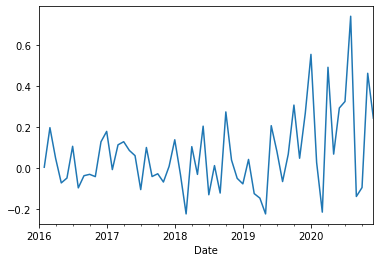

In [8]:
# 1. Calculate monthly returns
returns = tsla_dta['Adj Close'].pct_change()
returns.plot();

Total Return = 18.453712132223146


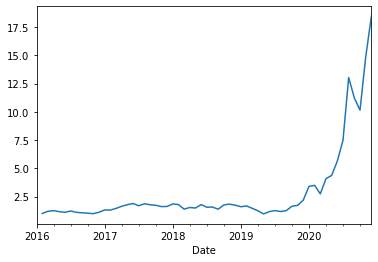

In [9]:
# 2. Calculate total return (compounded) at each point in time
tr = (returns + 1).cumprod()
total_ret = tr.iloc[-1] #this is the last element in tr
print(f"Total Return = {total_ret}");
tr.plot();
#plt.xticks(rotation = 60);

In [10]:
# 3. Calculate the geometric average return
geo_average = total_ret**(1/tr.size) - 1
print(f"Average return per month = {geo_average: .4f}");

Average return per month =  0.0498


# 7. For next class

- Watch video in "FIN 360 Review Videos" under "Risk and Risk Premiums"